# Netflix: Top Genre of 2025
## PREPROCESSING

In [86]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:

# Importing Dataset
df = pd.read_excel('Netflix_shows_2025_ready.xlsx')

In [88]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'genres', 'language', 'popularity', 'vote_count',
       'vote_average'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1000 non-null   int64         
 1   type          1000 non-null   object        
 2   title         1000 non-null   object        
 3   country       774 non-null    object        
 4   date_added    1000 non-null   datetime64[ns]
 5   release_year  1000 non-null   int64         
 6   rating        1000 non-null   float64       
 7   duration      1000 non-null   object        
 8   genres        861 non-null    object        
 9   language      1000 non-null   object        
 10  popularity    1000 non-null   float64       
 11  vote_count    1000 non-null   int64         
 12  vote_average  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 101.7+ KB


In [90]:
df.shape

(1000, 13)

In [91]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,genres,language,popularity,vote_count,vote_average
0,250060,TV Show,The First Frost,China,2025-02-18,2025,5.0,1 Seasons,Drama,zh,2073.387,2,5.0
1,278428,TV Show,Incognito,Philippines,2025-01-20,2025,10.0,1 Seasons,"Action & Adventure, Drama",tl,1449.087,1,10.0
2,279257,TV Show,Hallo Kroket!,Belgium,2025-01-06,2025,0.0,1 Seasons,"Kids, Reality",nl,1402.409,0,0.0
3,279914,TV Show,SÄ¾ub,Slovakia,2025-01-13,2025,0.0,1 Seasons,Family,sk,1390.092,0,0.0
4,280829,TV Show,Pokoli rokonok,Hungary,2025-01-02,2025,8.5,1 Seasons,Drama,hu,1364.861,4,8.5


In [92]:
df.tail()

,show_id,type,title,country,date_added,release_year,rating,duration,genres,language,popularity,vote_count,vote_average
995,284892,TV Show,Sammelanam,NaN,2025-02-20,2025,0.0,1 Seasons,"Comedy, Drama",te,3.236,0,0.0
996,277665,TV Show,Anne Shirley,Japan,2025-04-05,2025,0.0,1 Seasons,"Animation, Drama, Family",ja,3.558,0,0.0
997,284972,TV Show,Le onde del passato,NaN,2025-02-19,2025,10.0,1 Seasons,Drama,it,2.913,1,10.0
998,284613,TV Show,AIížˆì¹˜í•˜ì´ì»¤,NaN,2025-02-16,2025,0.0,1 Seasons,NaN,ko,2.787,0,0.0
999,251815,TV Show,Alex & Laura's Saturday Night Takeaway,NaN,2025-02-15,2025,0.0,1 Seasons,"Comedy, Family",en,2.485,0,0.0


In [93]:
df.describe()

,show_id,date_added,release_year,rating,popularity,vote_count,vote_average
count,1000.000000,1000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000
mean,269989.231000,2025-02-12 04:01:55.200000,2025.0,2.697521,37.538567,3.179000,2.697521
min,114471.000000,2025-01-01 00:00:00,2025.0,0.000000,2.323000,0.000000,0.000000
25%,259411.750000,2025-01-19 00:00:00,2025.0,0.000000,6.846500,0.000000,0.000000
50%,280969.000000,2025-02-12 00:00:00,2025.0,0.000000,12.694000,0.000000,0.000000
75%,283720.500000,2025-03-01 00:00:00,2025.0,7.000000,25.710250,1.000000,7.000000
max,285345.000000,2025-12-31 00:00:00,2025.0,10.000000,2073.387000,235.000000,10.000000
std,22672.946108,NaN,0.0,3.702193,123.585143,13.451539,3.702193


In [94]:
df.duplicated().sum()

np.int64(0)

In [95]:
df.nunique()

show_id         991
type              1
title           990
country          89
date_added      115
release_year      1
rating           81
duration          1
genres          162
language         41
popularity      941
vote_count       49
vote_average     81
dtype: int64

### Finding Null Values/Missing Values

In [96]:
df.isnull().sum()

show_id           0
type              0
title             0
country         226
date_added        0
release_year      0
rating            0
duration          0
genres          139
language          0
popularity        0
vote_count        0
vote_average      0
dtype: int64

In [97]:
df.isnull().sum() / len(df) * 100

show_id          0.0
type             0.0
title            0.0
country         22.6
date_added       0.0
release_year     0.0
rating           0.0
duration         0.0
genres          13.9
language         0.0
popularity       0.0
vote_count       0.0
vote_average     0.0
dtype: float64

Text(0.5, 1.0, 'Missing Values Heatmap')

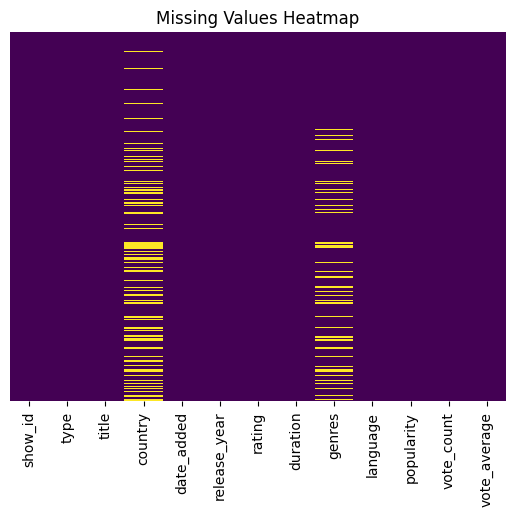

In [98]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')

### Finding Outliers

<Axes: ylabel='popularity'>

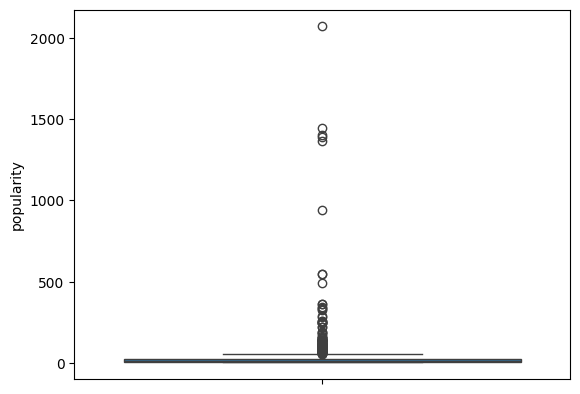

In [99]:
sns.boxplot(data=df, y = 'popularity')

<Axes: ylabel='rating'>

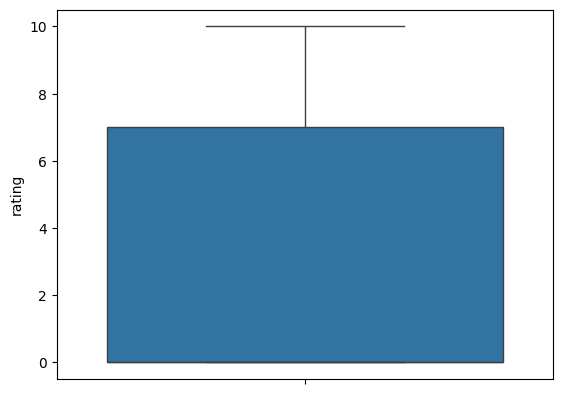

In [100]:
sns.boxplot(data=df, y = 'rating')

<Axes: ylabel='vote_count'>

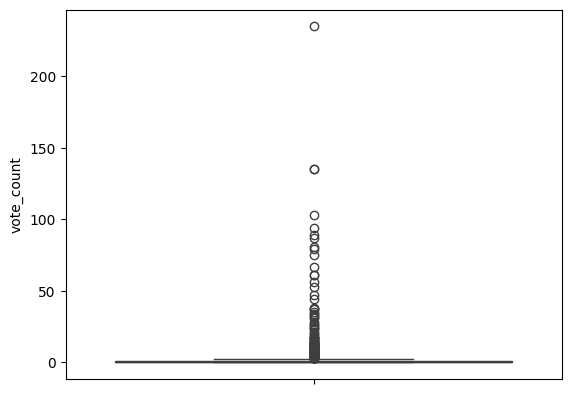

In [101]:
sns.boxplot(data=df, y = 'vote_count')

<Axes: ylabel='vote_average'>

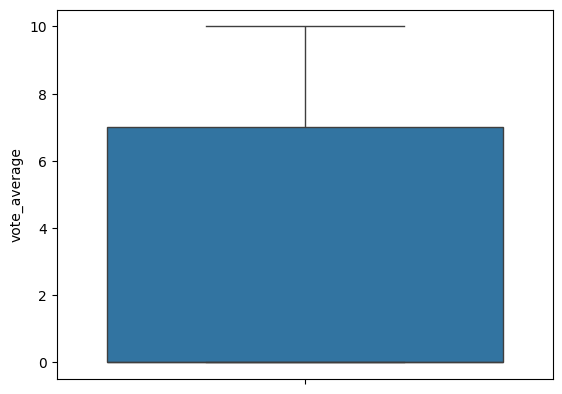

In [102]:
sns.boxplot(data=df, y = 'vote_average')

## Checking The distribution

<Axes: xlabel='popularity', ylabel='Count'>

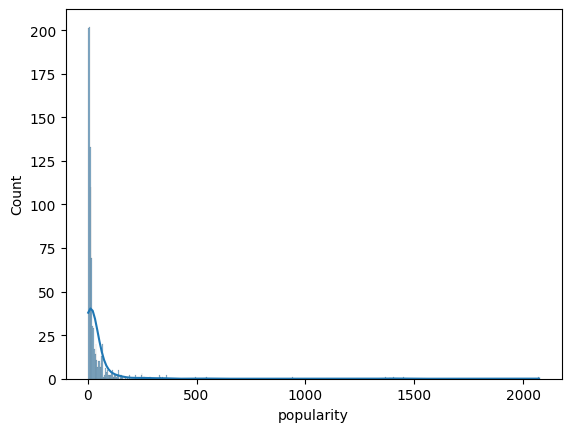

In [103]:
sns.histplot(df['popularity'], kde=True)

<Axes: xlabel='rating', ylabel='Count'>

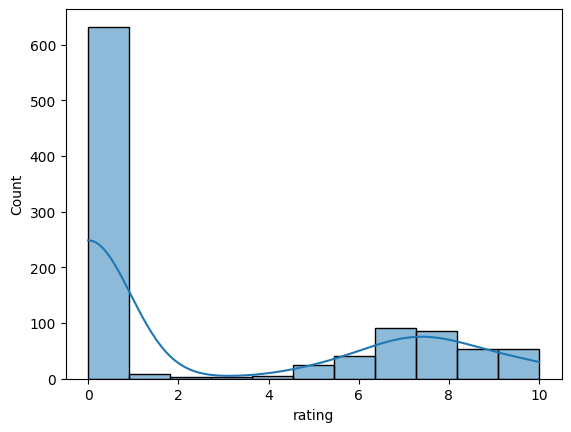

In [104]:
sns.histplot(df['rating'], kde=True)

<Axes: xlabel='vote_count', ylabel='Count'>

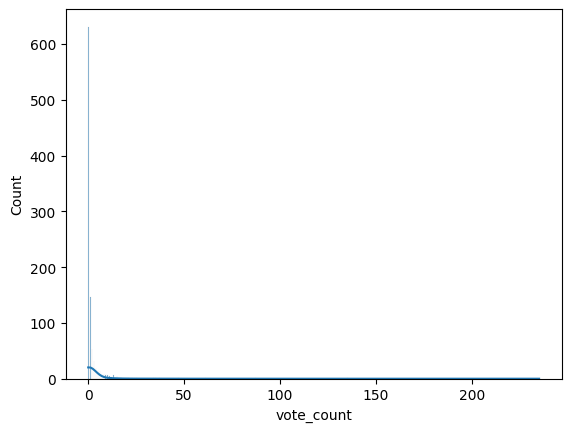

In [105]:
sns.histplot(df['vote_count'], kde=True)

<Axes: xlabel='vote_average', ylabel='Count'>

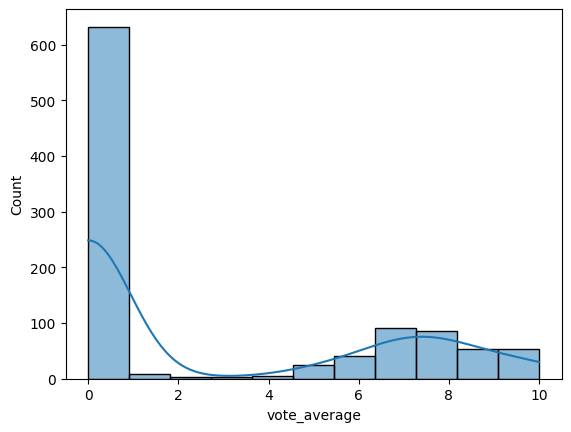

In [106]:
sns.histplot(df['vote_average'], kde=True)

# Now, Wrangling Start

## First Handling Missing Values

### Impute the country column using a dictionary of languages, and language column that is present in data

#### Country:

In [107]:
# Example dictionary (you can expand it based on your dataset)
language_country_map = {
    'English': 'United States',
    'Hindi': 'India',
    'Spanish': 'Spain',  # or 'Mexico' depending on your dataset distribution
    'French': 'France',
    'Japanese': 'Japan',
    'Korean': 'South Korea',
    'Mandarin': 'China',
    'German': 'Germany',
    'Italian': 'Italy',
    'Turkish': 'Turkey'
}


### Now fill country missing based on this dictionary, and fill else with unknown

In [108]:
import numpy as np

# Fill missing 'country' using 'language' column
df['country'] = np.where(
    df['country'].isna(), 
    df['language'].map(language_country_map),  # map language to country
    df['country']  # keep existing country
)

# For any rows where country is still missing (language not in map), fill with "Unknown"
df['country'] = df['country'].fillna("Unknown")

In [109]:
df.isnull().sum()

show_id           0
type              0
title             0
country           0
date_added        0
release_year      0
rating            0
duration          0
genres          139
language          0
popularity        0
vote_count        0
vote_average      0
dtype: int64

<Axes: >

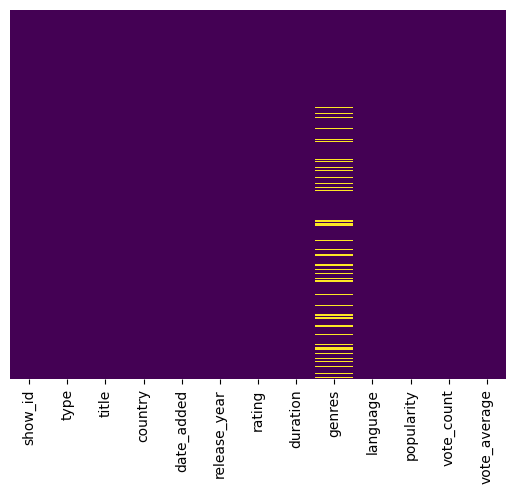

In [110]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

#### Genre

### Impute genres by the help of title column

### First, define a dictionary of keywords related to genres

In [111]:
# Dictionary of keywords and their corresponding genres
keyword_genre_map = {
    'love': 'Romance',
    'romantic': 'Romance',
    'crime': 'Crime',
    'detective': 'Crime',
    'murder': 'Crime',
    'war': 'War',
    'battle': 'War',
    'science': 'Sci-Fi',
    'space': 'Sci-Fi',
    'alien': 'Sci-Fi',
    'comedy': 'Comedy',
    'funny': 'Comedy',
    'drama': 'Drama',
    'documentary': 'Documentary',
    'history': 'History',
    'biography': 'Documentary',
    'music': 'Music',
    'concert': 'Music',
    'horror': 'Horror',
    'thriller': 'Thriller',
    'adventure': 'Adventure',
    'fantasy': 'Fantasy',
    'superhero': 'Action',
    'action': 'Action'
}


### Define a function to assign genres

In [112]:
import numpy as np

def infer_genre_from_title(title): # defining a function
    if pd.isna(title): # if there is any missing row in title, so return "none"
        return None
    title_lower = title.lower() # convert entries of title in lower case
    for keyword, genre in keyword_genre_map.items(): # Loops through every keyword → genre pair in your keyword_genre_map dictionary.
        if keyword in title_lower: # if keyword is present then rturn genre
            return genre
    return None  # If no keyword matches


### Now fill the missing genres using function

In [113]:
# Fill missing genres based on title
df['genres'] = np.where(
    df['genres'].isna(), # where genre is missing
    df['title'].apply(infer_genre_from_title), # apply the function on title 
    df['genres'] # and fill genres where it is missing
)

# If some still remain missing, fill them as "Unknown"
df['genres'] = df['genres'].fillna("Unknown")


In [114]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
language        0
popularity      0
vote_count      0
vote_average    0
dtype: int64

<Axes: >

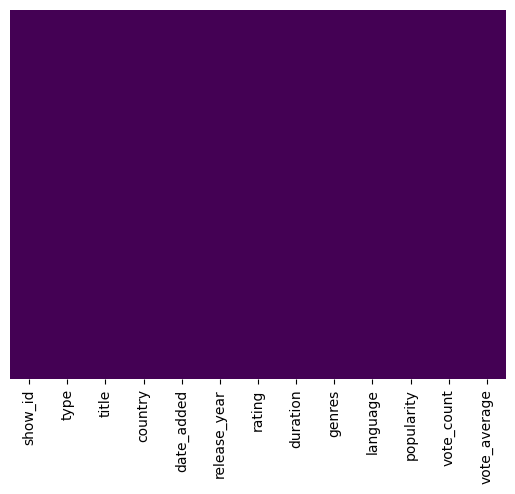

In [115]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

### Missing values done

# Dealing with Outliers

### Popularity and Vote_count have some outliers


<Axes: ylabel='popularity'>

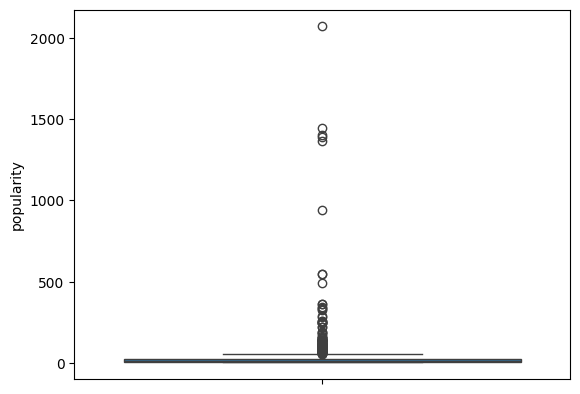

In [116]:
sns.boxplot(data=df, y = 'popularity')

In [117]:
df.shape

(1000, 13)

In [118]:
df['popularity'].describe()

count    1000.000000
mean       37.538567
std       123.585143
min         2.323000
25%         6.846500
50%        12.694000
75%        25.710250
max      2073.387000
Name: popularity, dtype: float64

<Axes: ylabel='vote_count'>

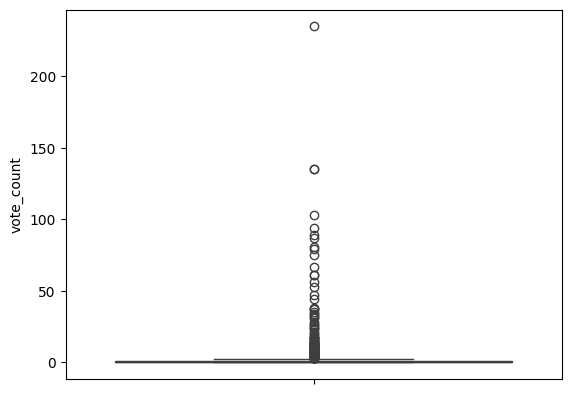

In [119]:
sns.boxplot(data=df, y = 'vote_count')

In [120]:
df['vote_count'].describe()    

count    1000.000000
mean        3.179000
std        13.451539
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       235.000000
Name: vote_count, dtype: float64

### I have come to the point that these high values or zeroes are not the ouliers, but are the real data of netflix. We should not remove them instead we can scale them to analyze easily.

# Now transforming the data

### popularity
### vote_count
### rating
### vote_average


## popularity

In [121]:
# Normalizing the popularity using log transformation
df['popularity'] = np.log(df['popularity'])
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,genres,language,popularity,vote_count,vote_average
0,250060,TV Show,The First Frost,China,2025-02-18,2025,5.0,1 Seasons,Drama,zh,7.636939,2,5.0
1,278428,TV Show,Incognito,Philippines,2025-01-20,2025,10.0,1 Seasons,"Action & Adventure, Drama",tl,7.278689,1,10.0
2,279257,TV Show,Hallo Kroket!,Belgium,2025-01-06,2025,0.0,1 Seasons,"Kids, Reality",nl,7.245947,0,0.0
3,279914,TV Show,SÄ¾ub,Slovakia,2025-01-13,2025,0.0,1 Seasons,Family,sk,7.237125,0,0.0
4,280829,TV Show,Pokoli rokonok,Hungary,2025-01-02,2025,8.5,1 Seasons,Drama,hu,7.218808,4,8.5


<Axes: xlabel='popularity', ylabel='Count'>

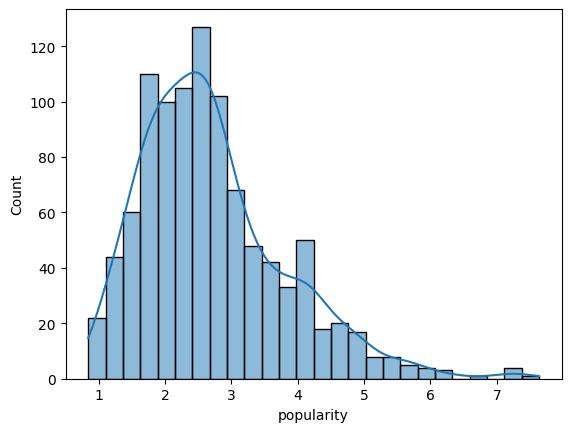

In [124]:
sns.histplot(df['popularity'], kde=True)

### After applying LOG on popularity

### vote_count

In [122]:
df['vote_count'].describe()

count    1000.000000
mean        3.179000
std        13.451539
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       235.000000
Name: vote_count, dtype: float64

In [123]:
# Normalizing the popularity using log transformation
df['vote_count'] = np.log1p(df['vote_count'])
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,genres,language,popularity,vote_count,vote_average
0,250060,TV Show,The First Frost,China,2025-02-18,2025,5.0,1 Seasons,Drama,zh,7.636939,1.098612,5.0
1,278428,TV Show,Incognito,Philippines,2025-01-20,2025,10.0,1 Seasons,"Action & Adventure, Drama",tl,7.278689,0.693147,10.0
2,279257,TV Show,Hallo Kroket!,Belgium,2025-01-06,2025,0.0,1 Seasons,"Kids, Reality",nl,7.245947,0.000000,0.0
3,279914,TV Show,SÄ¾ub,Slovakia,2025-01-13,2025,0.0,1 Seasons,Family,sk,7.237125,0.000000,0.0
4,280829,TV Show,Pokoli rokonok,Hungary,2025-01-02,2025,8.5,1 Seasons,Drama,hu,7.218808,1.609438,8.5


<Axes: xlabel='vote_count', ylabel='Count'>

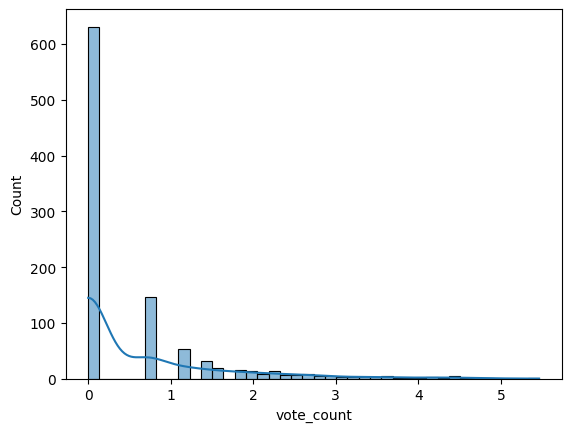

In [125]:
sns.histplot(df['vote_count'], kde=True)

### After applying log10 on vote_count

### rating

In [126]:
df['rating'].describe()

count    1000.000000
mean        2.697521
std         3.702193
min         0.000000
25%         0.000000
50%         0.000000
75%         7.000000
max        10.000000
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='Count'>

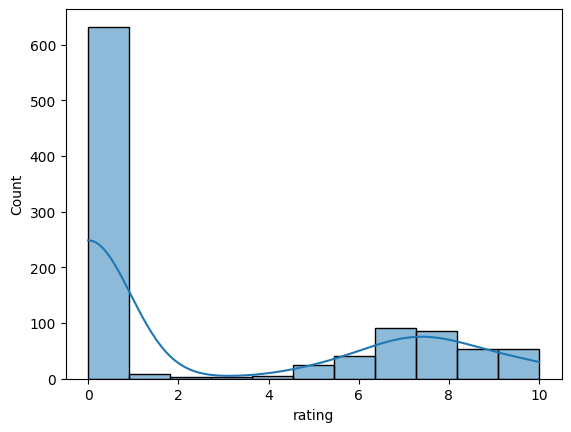

In [127]:
sns.histplot(df['rating'], kde=True)

### There is no need to transform rating

### vote_average

In [129]:
df['vote_average'].describe()

count    1000.000000
mean        2.697521
std         3.702193
min         0.000000
25%         0.000000
50%         0.000000
75%         7.000000
max        10.000000
Name: vote_average, dtype: float64

### There is no need to transform vote_average

In [131]:
df.to_excel('Netflix_shows_2025_ready_cleaned.xlsx', index=False)